In [3]:
 pip install python-mnist

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.utils import np_utils
import statistics
from mnist import MNIST
import os
from sklearn.model_selection import train_test_split
from numpy import random
from google.colab import drive


drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/


/content/drive/MyDrive


In [6]:
mndata = MNIST('mnist')
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Convert output to categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

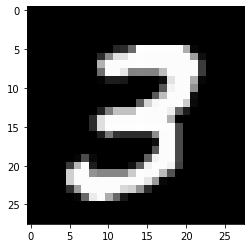

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(X_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])

In [9]:
# SGD Optimizer
opt1 = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(10, activation='softmax', name='outputlayer')
    ]
)
opt1.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

history = opt1.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

loss, acc = opt1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

1875/1875 [==============================] - 6s 3ms/step - loss: 10.8994 - accuracy: 0.1119 - val_loss: 2.3011 - val_accuracy: 0.1135
Test Accuracy: 0.11349999904632568
Test Loss: 2.301058769226074


In [10]:
# adam Optimizer
opt2 = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(10, activation='softmax', name='outputlayer')
    ]
)
opt2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

history = opt2.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

loss, acc = opt2.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

1875/1875 [==============================] - 6s 3ms/step - loss: 2.1818 - accuracy: 0.4481 - val_loss: 1.0540 - val_accuracy: 0.6022
Test Accuracy: 0.6021999716758728
Test Loss: 1.0539900064468384


In [11]:
# RMSprop Optimizer
opt3 = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(10, activation='softmax', name='outputlayer')
    ]
)
opt3.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])

history = opt3.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

loss, acc = opt3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

1875/1875 [==============================] - 6s 3ms/step - loss: 2.0744 - accuracy: 0.7231 - val_loss: 1.0366 - val_accuracy: 0.8360
Test Accuracy: 0.8360000252723694
Test Loss: 1.0365811586380005


In [12]:
# adagrad Optimizer
opt4 = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(10, activation='softmax', name='outputlayer')
    ]
)
opt4.compile(optimizer="adagrad", loss='categorical_crossentropy', metrics=['accuracy'])

history = opt4.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

loss, acc = opt4.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', acc)
print('Test Loss:', loss)

1875/1875 [==============================] - 6s 3ms/step - loss: 6.2332 - accuracy: 0.4248 - val_loss: 2.2979 - val_accuracy: 0.4172
Test Accuracy: 0.4171999990940094
Test Loss: 2.2978832721710205


In [13]:

def get_train_valid_data(X, y):
  """
  Method to split training data into sub training data and CV data randomly eachtime this method is called
  """
  return train_test_split(X, y, test_size=0.166, shuffle=True, random_state=random.randint(100))

In [20]:
# Architecure 1
acc_list = []
for i in range(10):
  sub_X_train, sub_X_cv, sub_y_train, sub_y_cv = get_train_valid_data(X_train, y_train)
# Using RMS prop optimizer
  model1 = keras.Sequential(
      [
          layers.Dense(32, activation="relu", name="layer1"),
          layers.Dense(10, activation='softmax', name='outputlayer')
      ]
  )
  model1.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])

  history = model1.fit(sub_X_train, sub_y_train, epochs=2, batch_size=32, validation_data=(sub_X_cv, sub_y_cv))

  loss, acc = model1.evaluate(X_test, y_test, verbose=0)
  acc_list.append(acc)
print("Average Test Accuracy:", statistics.mean(acc_list))  

Epoch 1/2
1564/1564 [==============================] - 7s 3ms/step - loss: 1.8075 - accuracy: 0.6712 - val_loss: 0.9088 - val_accuracy: 0.8166
Epoch 2/2
1564/1564 [==============================] - 5s 3ms/step - loss: 0.7248 - accuracy: 0.8459 - val_loss: 0.6514 - val_accuracy: 0.8696
Epoch 1/2
1564/1564 [==============================] - 8s 4ms/step - loss: 1.8394 - accuracy: 0.5999 - val_loss: 0.9038 - val_accuracy: 0.7613
Epoch 2/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.8492 - accuracy: 0.8170 - val_loss: 0.8181 - val_accuracy: 0.8430
Epoch 1/2
1564/1564 [==============================] - 5s 3ms/step - loss: 2.0860 - accuracy: 0.7075 - val_loss: 0.8438 - val_accuracy: 0.8514
Epoch 2/2
1564/1564 [==============================] - 4s 3ms/step - loss: 0.7651 - accuracy: 0.8587 - val_loss: 0.7090 - val_accuracy: 0.8777
Epoch 1/2
1564/1564 [==============================] - 5s 3ms/step - loss: 2.2102 - accuracy: 0.7000 - val_loss: 1.1392 - val_accuracy: 0.8427

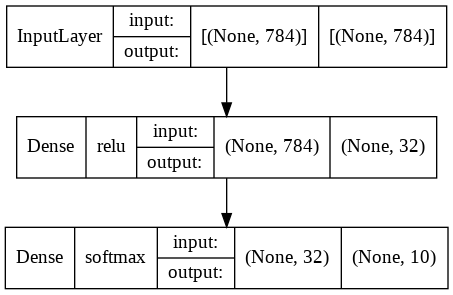

In [21]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [22]:
# Architecure 2
acc_list = []
for i in range(10):
  sub_X_train, sub_X_cv, sub_y_train, sub_y_cv = get_train_valid_data(X_train, y_train)
# Using RMS prop optimizer
  model2 = keras.Sequential(
      [
          layers.Dense(64, activation="relu", name="layer1"),
          layers.Dense(10, activation='softmax', name='outputlayer')
      ]
  )
  model2.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])

  history = model2.fit(sub_X_train, sub_y_train, epochs=2, batch_size=32, validation_data=(sub_X_cv, sub_y_cv))

  loss, acc = model2.evaluate(X_test, y_test, verbose=0)
  acc_list.append(acc)
print("Average Test Accuracy:", statistics.mean(acc_list))  

Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 2.9285 - accuracy: 0.8401 - val_loss: 0.7096 - val_accuracy: 0.8968
Epoch 2/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.6398 - accuracy: 0.9031 - val_loss: 0.6707 - val_accuracy: 0.9140
Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 2.8663 - accuracy: 0.8330 - val_loss: 0.7774 - val_accuracy: 0.8884
Epoch 2/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.6555 - accuracy: 0.9055 - val_loss: 0.7702 - val_accuracy: 0.9147
Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 2.3747 - accuracy: 0.8165 - val_loss: 0.8073 - val_accuracy: 0.8880
Epoch 2/2
1564/1564 [==============================] - 5s 3ms/step - loss: 0.6633 - accuracy: 0.8986 - val_loss: 0.7489 - val_accuracy: 0.8985
Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 2.1960 - accuracy: 0.8133 - val_loss: 0.6717 - val_accuracy: 0.8881

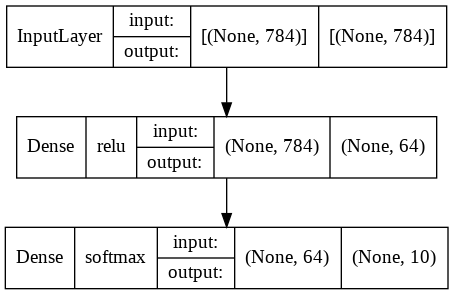

In [27]:

+tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [23]:
# Architecure 3
acc_list = []
for i in range(10):
  sub_X_train, sub_X_cv, sub_y_train, sub_y_cv = get_train_valid_data(X_train, y_train)
# Using RMS prop optimizer
  model3 = keras.Sequential(
      [
          layers.Dense(64, activation="relu", name="layer1"),
          layers.Dense(32,activation="tanh",name="layer2"),     
          layers.Dense(10, activation='softmax', name='outputlayer')
      ]
  )
  model3.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])

  history = model3.fit(sub_X_train, sub_y_train, epochs=2, batch_size=32, validation_data=(sub_X_cv, sub_y_cv))

  loss, acc = model3.evaluate(X_test, y_test, verbose=0)
  acc_list.append(acc)
print("Average Test Accuracy:", statistics.mean(acc_list))  

Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 0.8235 - accuracy: 0.7404 - val_loss: 0.5402 - val_accuracy: 0.8348
Epoch 2/2
1564/1564 [==============================] - 5s 3ms/step - loss: 0.4631 - accuracy: 0.8612 - val_loss: 0.4392 - val_accuracy: 0.8726
Epoch 1/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.9470 - accuracy: 0.7026 - val_loss: 0.6053 - val_accuracy: 0.8205
Epoch 2/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.5314 - accuracy: 0.8372 - val_loss: 0.4232 - val_accuracy: 0.8712
Epoch 1/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.9030 - accuracy: 0.7118 - val_loss: 0.5439 - val_accuracy: 0.8333
Epoch 2/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.4836 - accuracy: 0.8549 - val_loss: 0.4326 - val_accuracy: 0.8705
Epoch 1/2
1564/1564 [==============================] - 6s 4ms/step - loss: 0.8571 - accuracy: 0.7246 - val_loss: 0.5281 - val_accuracy: 0.8335

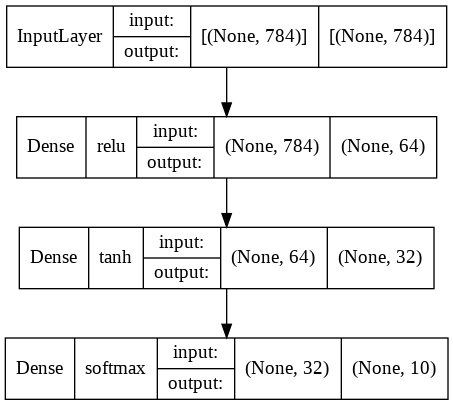

In [24]:
tf.keras.utils.plot_model(model3, show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [25]:
# Architecure 4
acc_list = []
for i in range(10):
  sub_X_train, sub_X_cv, sub_y_train, sub_y_cv = get_train_valid_data(X_train, y_train)
# Using RMS prop optimizer
  model4 = keras.Sequential(
      [
          layers.Dense(64, activation="relu", name="layer1"),
          layers.Dense(32,activation="tanh",name="layer2"),
          layers.Dense(16,activation="sigmoid",name="layer3"),      
          layers.Dense(10, activation='softmax', name='outputlayer')
      ]
  )
  model4.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])

  history = model4.fit(sub_X_train, sub_y_train, epochs=2, batch_size=32, validation_data=(sub_X_cv, sub_y_cv))

  loss, acc = model4.evaluate(X_test, y_test, verbose=0)
  acc_list.append(acc)
print("Average Test Accuracy:", statistics.mean(acc_list))  

Epoch 1/2
1564/1564 [==============================] - 7s 4ms/step - loss: 1.1149 - accuracy: 0.6787 - val_loss: 0.6679 - val_accuracy: 0.8120
Epoch 2/2
1564/1564 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8439 - val_loss: 0.4696 - val_accuracy: 0.8642
Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 1.0755 - accuracy: 0.7029 - val_loss: 0.5923 - val_accuracy: 0.8317
Epoch 2/2
1564/1564 [==============================] - 5s 3ms/step - loss: 0.5163 - accuracy: 0.8478 - val_loss: 0.4363 - val_accuracy: 0.8756
Epoch 1/2
1564/1564 [==============================] - 6s 3ms/step - loss: 1.1135 - accuracy: 0.6800 - val_loss: 0.6164 - val_accuracy: 0.8347
Epoch 2/2
1564/1564 [==============================] - 5s 3ms/step - loss: 0.5718 - accuracy: 0.8332 - val_loss: 0.5332 - val_accuracy: 0.8418
Epoch 1/2
1564/1564 [==============================] - 6s 4ms/step - loss: 1.1134 - accuracy: 0.6923 - val_loss: 0.6934 - val_accuracy: 0.7965

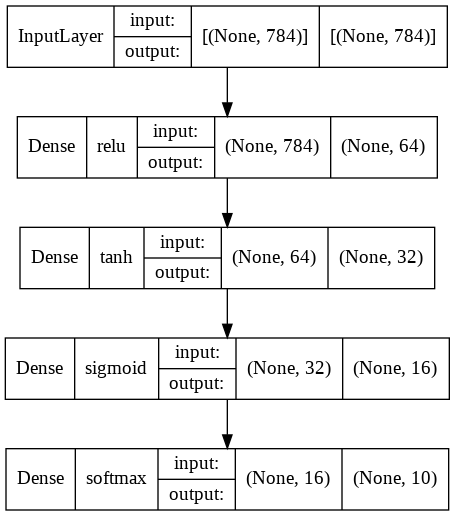

In [26]:
tf.keras.utils.plot_model(model4, show_shapes=True, show_layer_names=False, show_layer_activations=True)

Optimizer Evaluation:

Architure  | Test Accuracy in %
-------------------|------------------
SGD            |11.34
adam           |60.21
RMSprop        |83.6
adagrad        |41.7



**BEST OPTIMIZER**
RMSprop : 83.6(accuracy)

**ARCHITECTURE Evaluation


Architure  | Test Accuracy in %
-------------------|------------------
Model1   |86.25
Model2  |91.23
Model3 |86.93
Model4 | 86.27